# Explore here

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

In [2]:
data = pd.read_csv('/Users/SamuelHollis/Desktop/4GeeksAcademy/20a clase-Arbol_de_Decisión/Arbol_de_Decision_Project/data/raw/data')

In [3]:
df = pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


check duplicados

In [7]:
df.duplicated().sum()

0

chech nulos

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

check outliers

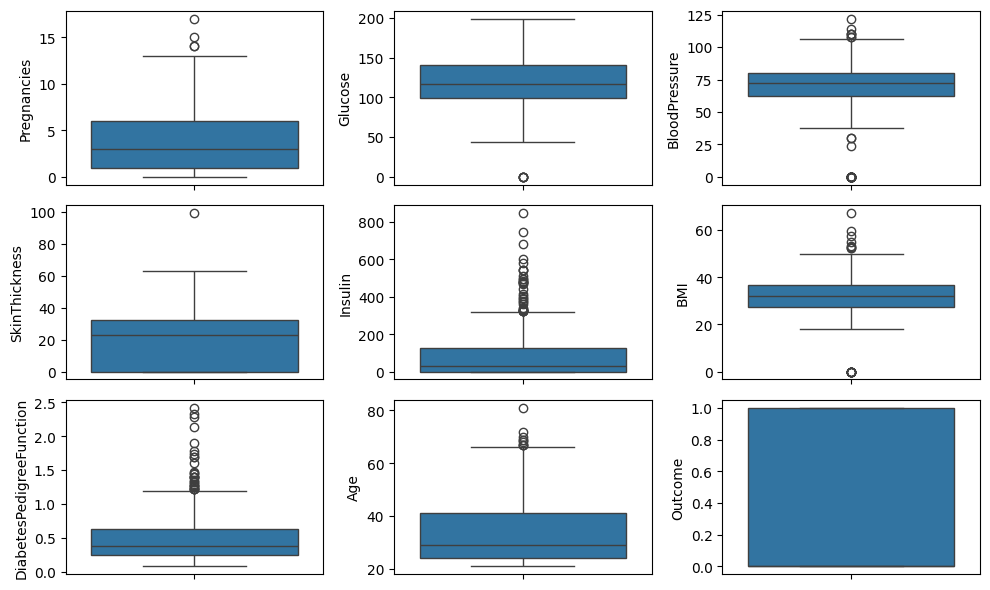

In [9]:
fig, axis = plt.subplots(3, 3, figsize= (10, 6))

sns.boxplot(ax = axis[0, 0], data = df, y = 'Pregnancies')
sns.boxplot(ax = axis[0, 1], data = df, y = 'Glucose')
sns.boxplot(ax = axis[0, 2], data = df, y = 'BloodPressure')
sns.boxplot(ax = axis[1, 0], data = df, y = 'SkinThickness')
sns.boxplot(ax = axis[1, 1], data = df, y = 'Insulin')
sns.boxplot(ax = axis[1, 2], data = df, y = 'BMI')
sns.boxplot(ax = axis[2, 0], data = df, y = 'DiabetesPedigreeFunction')
sns.boxplot(ax = axis[2, 1], data = df, y = 'Age')
sns.boxplot(ax = axis[2, 2], data = df, y = 'Outcome')

plt.tight_layout()
plt.show()



Vemos que en *Glucose*, *Bloodpressure*, *Insulin* y *BMI* hay outliers que pueden ser preocupantes; Comprobamos si es asi y eliminamos is hace falta y no daña el ds

**Glucose**

In [10]:
print((df['Glucose'] == 0).sum())

5


**BloodPressure**

In [11]:
print((df['BloodPressure'] == 0).sum())

35


No elimino los registros porque considero que son demasiados

**Insulin**

In [12]:
print((df['Insulin'] >= 600).sum())

4


**BMI**

In [13]:
print((df['BMI'] == 0).sum())

11


Despues de entrenar el modelo, he visto que estos outliers aportan valor a el mismo. por lo tanto, no los elimino

### Mapa de calor para ver las relaciones

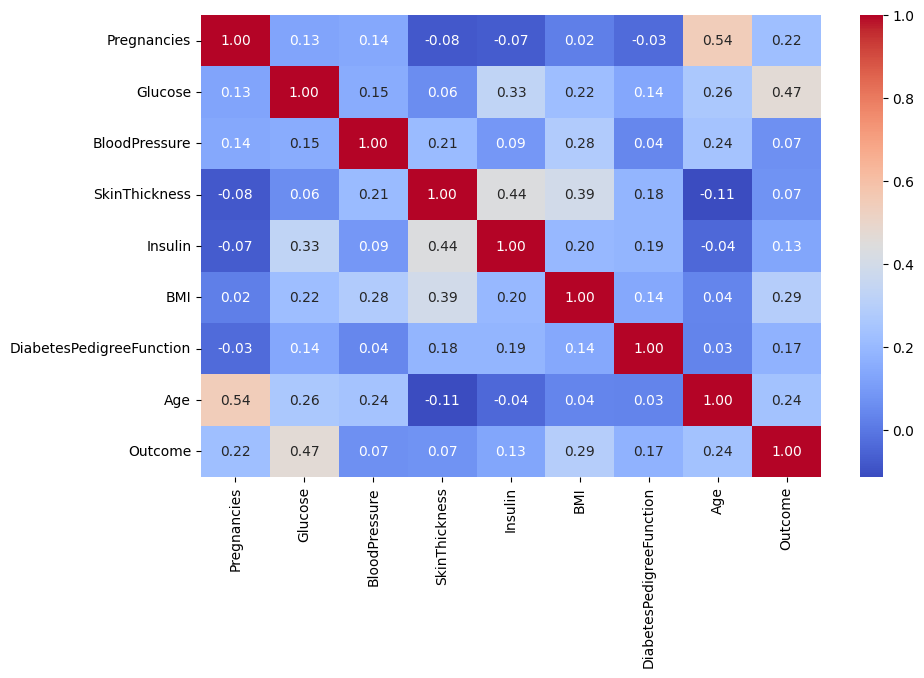

In [14]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear una figura de tamaño adecuado
plt.figure(figsize=(10, 6))

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Mostrar el gráfico
plt.show()

Considero eliminar las dos columnas con menos relacion

In [15]:
df = df.drop(columns='SkinThickness')
df = df.drop(columns='BloodPressure')

despues de varias pruebas, veo que la eliminacion de éstas dos columnas augmenta la precision de mi modelo.

## Separamos en Train y Test

In [16]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0.0,0.304,21
618,9,112,0,28.2,1.282,50
346,1,139,83,28.7,0.654,22
294,0,161,0,21.9,0.254,65
231,6,134,370,46.2,0.238,46


In [17]:
y.unique()

array([1, 0])

Visulaizamos en parallel coordinates

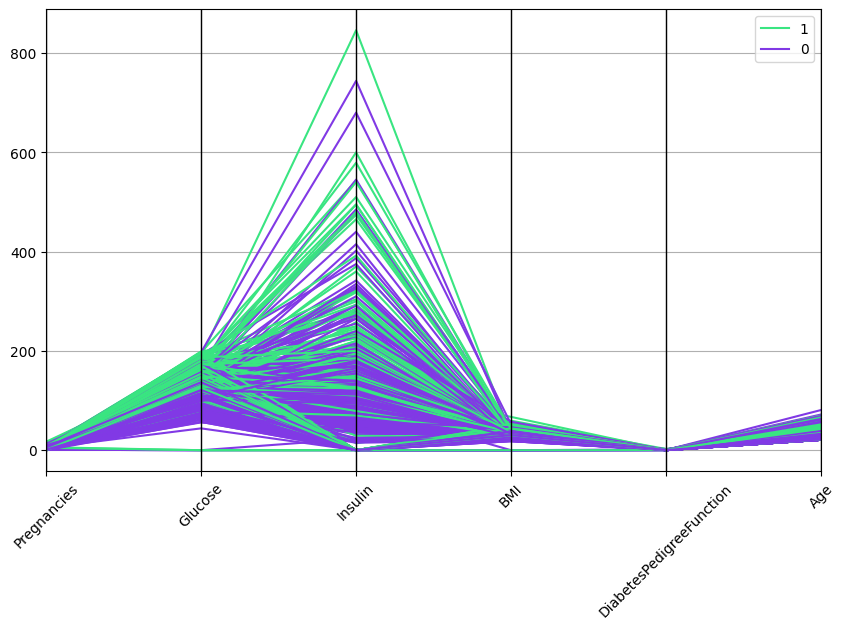

In [18]:
total_data = X
total_data["Outcome"] = y

plt.figure(figsize=(10, 6))
parallel_coordinates_plot = pd.plotting.parallel_coordinates(total_data, "Outcome", color=("#39E581", "#8139E5"))

# Rotar las etiquetas del eje Y
_ = plt.xticks(rotation=45)

# Modelo de clasificación

## Modelamos

In [33]:
model = DecisionTreeClassifier(max_depth= 5, min_samples_split = 3, criterion = 'log_loss', random_state= 42)

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, min_samples_split=3,
                       random_state=42)

In [20]:
params = {'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'random_state': [None, 42]}

In [21]:
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

In [22]:
grid_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
2160 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='log_loss', max_depth=5,
                                              min_samples_split=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [None, 42],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [34]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'random_state': None,
 'splitter': 'random'}

In [35]:
best_estimator = grid_search.best_estimator_
best_estimator

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [26]:
y_pred_grid = best_estimator.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred_grid)

In [28]:
accuracy

0.7532467532467533

falta hecharle un rato mas probando diferentes opciones de parametros en el grid

In [37]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [36]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,

Visualizamos el proceso del tree

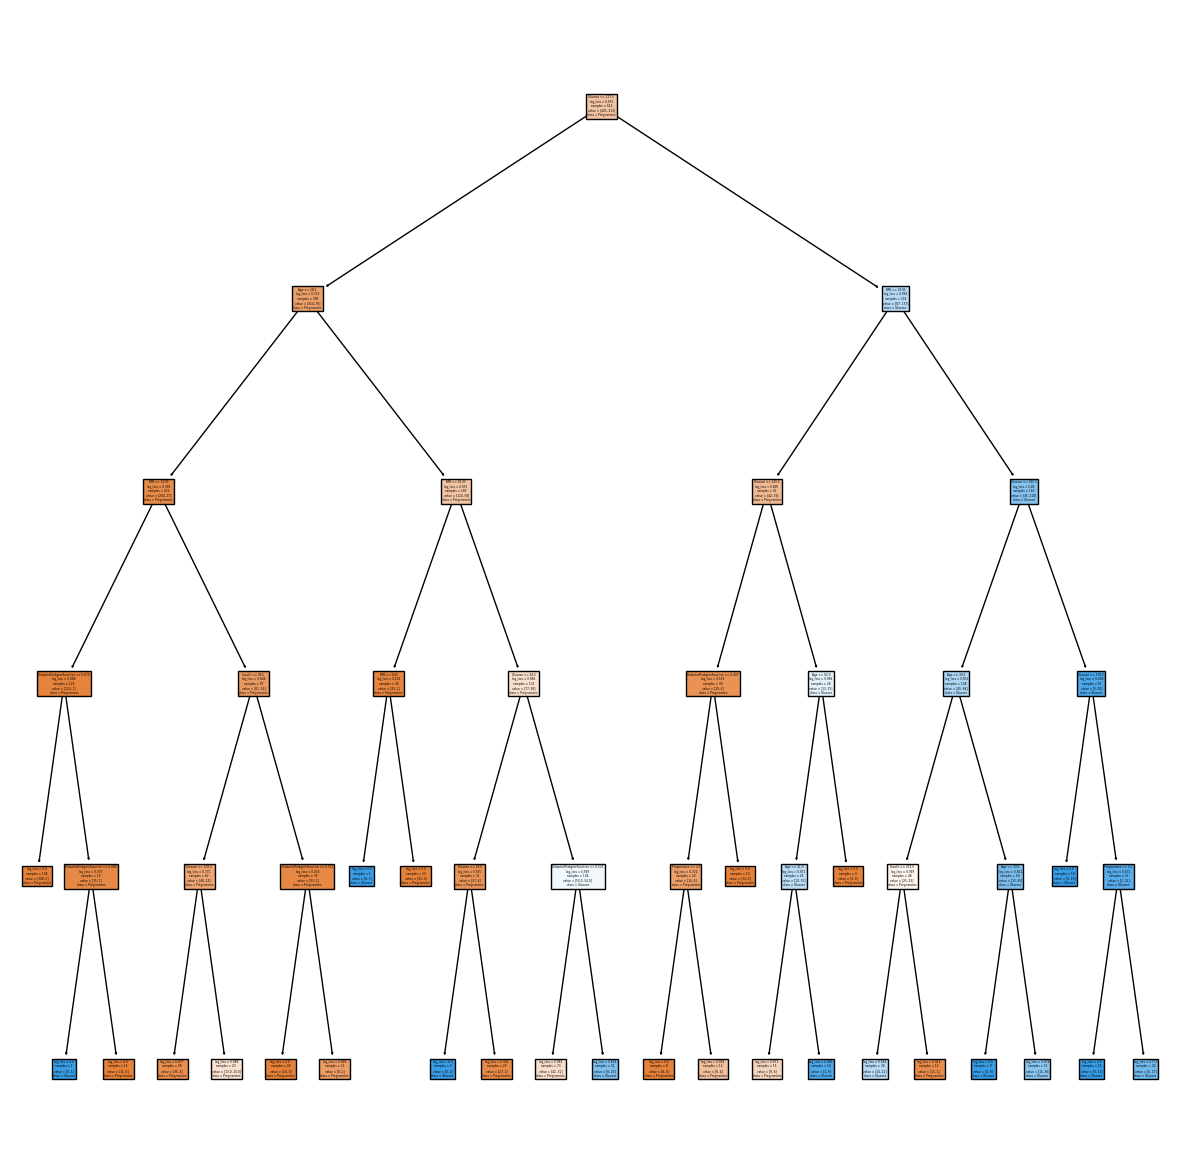

In [31]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = X_train.columns, filled = True)

plt.show()

Comprobamos metricas

In [38]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7857142857142857
F1 score Test:  0.7857142857142857
Precision Test:  0.7857142857142857
Recall Test:  0.7857142857142857
Accuracy Train:  0.8322475570032574
F1 score Train:  0.8322475570032574
Precision Train:  0.8322475570032574
Recall Train:  0.8322475570032574


In [ ]:
dump(model, open("decision_tree_classifier_default_42.sav", "wb"))